In [1]:
# Run this cell if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset folder: https://drive.google.com/drive/folders/1fof_IoTHYQxJkYZsPWeXyYvervA20y-A

In [ ]:
# Un zip the dataset folder
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/DL/image_classification/data/Train and Validation.zip", "r") as f:
    f.extractall("/content/drive/MyDrive/DL/image_classification/data/face_expression_data/")

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model
import os
import glob

In [ ]:
img_rows, img_cols, = 48,48
num_channel = 1
input_shape = (img_rows, img_cols, num_channel)
batch_size= 8
epochs = 25

train_data_dir = "/content/drive/MyDrive/DL/image_classification/data/face_expression_data/train"
validation_data_dir = "/content/drive/MyDrive/DL/image_classification/data/face_expression_data/validation"

In [ ]:
num_classes = 0
for i in glob.glob(train_data_dir+"/*"):
    num_classes += 1
print(num_classes)

5


In [ ]:
train_data_generator = ImageDataGenerator(rotation_range=30,
                                          width_shift_range=0.3,
                                          height_shift_range=0.3,
                                          horizontal_flip=True,
                                          shear_range=25,
                                          zoom_range=0.35,
                                          vertical_flip=True,
                                          rescale=1./255)

validation_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(train_data_dir,
                                                           color_mode="grayscale",
                                                           target_size=(img_rows, img_cols),
                                                           batch_size=batch_size,
                                                           class_mode="categorical",
                                                           shuffle=True)

validation_generator = validation_data_generator.flow_from_directory(validation_data_dir,
                                                           color_mode="grayscale",
                                                           target_size=(img_rows, img_cols),
                                                           batch_size=batch_size,
                                                           class_mode="categorical",
                                                           shuffle=True)

Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


In [ ]:
model = tensorflow.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal', activation='elu',
                 input_shape=(img_rows,img_cols,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal',activation='elu',))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax',kernel_initializer='he_normal'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

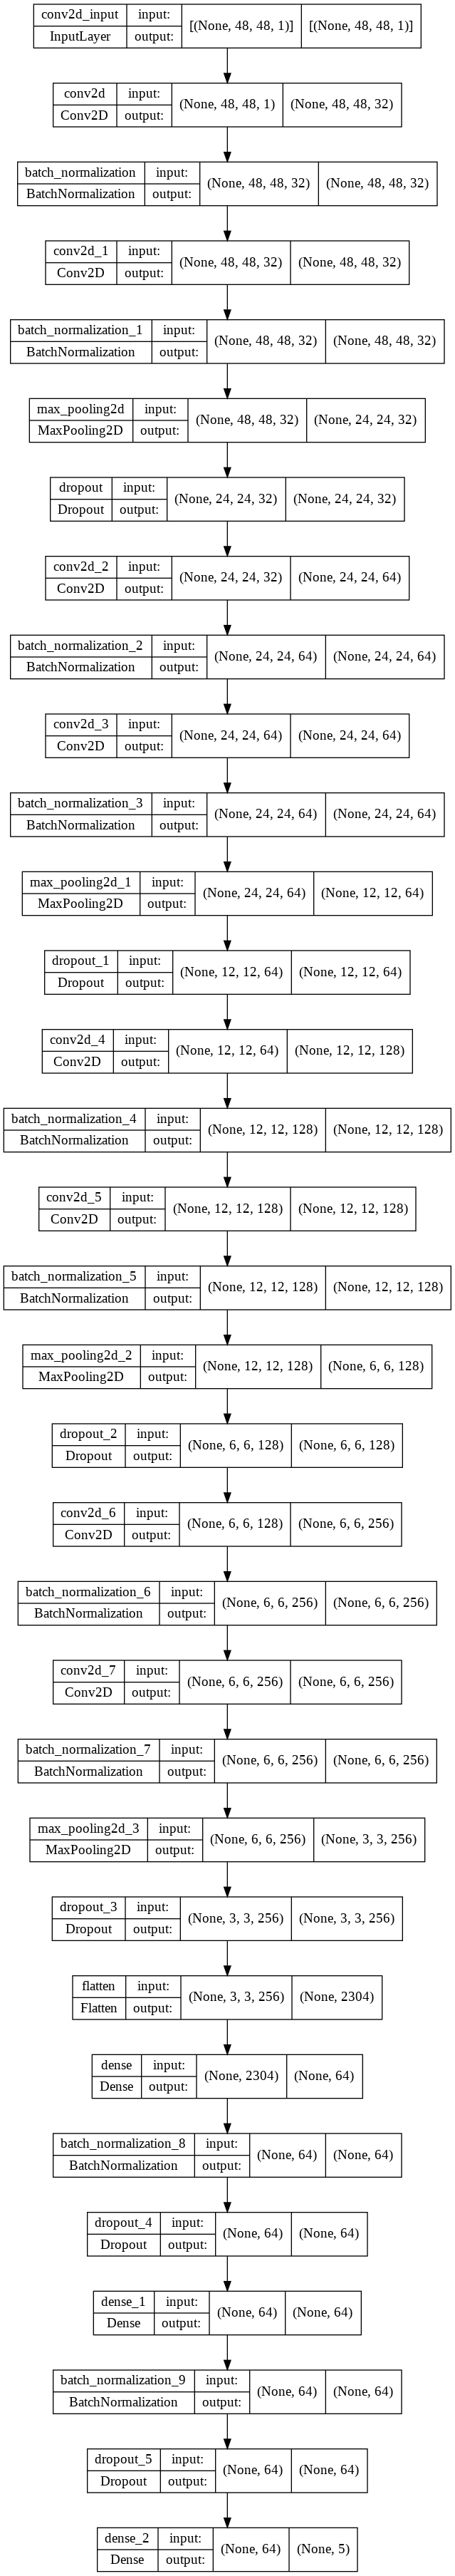

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/DL/image_classification/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint(r'/content/drive/MyDrive/DL/image_classification/trained_models/facial_emotion_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [ ]:
train_sample = 0
for i in glob.glob(train_data_dir+"/*"):
  #print(i)
  for j in glob.glob(i+"/*"):
    train_sample += 1
print(f"train_sample: {train_sample}")

train_sample: 24282


In [ ]:
validation_sample = 0
for i in glob.glob(validation_data_dir+"/*"):
  #print(i)
  for j in glob.glob(i+"/*"):
    validation_sample += 1
print(f"validation_sample: {validation_sample}")

validation_sample: 5937


In [ ]:
history=model.fit(
                train_generator,
                steps_per_epoch=train_sample//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=validation_sample//batch_size)

Epoch 1/25
3034/3035 [============================>.] - ETA: 0s - loss: 1.5634 - accuracy: 0.2907
Epoch 1: val_loss improved from inf to 1.52287, saving model to /content/drive/MyDrive/DL/image_classification/trained_models/facial_emotion_model.h5
3035/3035 [==============================] - 83s 27ms/step - loss: 1.5633 - accuracy: 0.2908 - val_loss: 1.5229 - val_accuracy: 0.3241 - lr: 2.0000e-04
Epoch 2/25
3035/3035 [==============================] - ETA: 0s - loss: 1.5522 - accuracy: 0.2958
Epoch 2: val_loss improved from 1.52287 to 1.49262, saving model to /content/drive/MyDrive/DL/image_classification/trained_models/facial_emotion_model.h5
3035/3035 [==============================] - 81s 27ms/step - loss: 1.5522 - accuracy: 0.2958 - val_loss: 1.4926 - val_accuracy: 0.3438 - lr: 2.0000e-04
Epoch 3/25
3034/3035 [============================>.] - ETA: 0s - loss: 1.5298 - accuracy: 0.3080
Epoch 3: val_loss did not improve from 1.49262
3035/3035 [==============================] - 80s 26

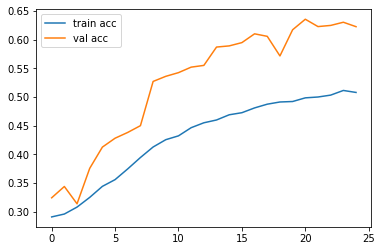

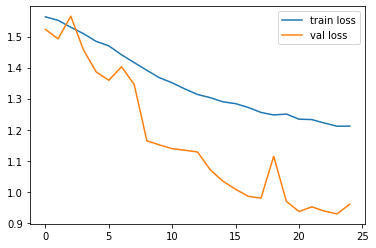

In [ ]:
import matplotlib.pyplot as plt

# plotting the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc_plot.png')
plt.show()


# plotting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()